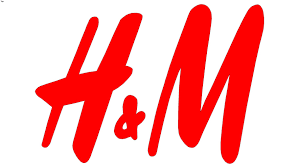


**H&M Group is a family of brands and businesses with 53 online markets and approximately 4,850 stores. Our online store offers shoppers an extensive selection of products to browse through. But with too many choices, customers might not quickly find what interests them or what they are looking for, and ultimately, they might not make a purchase. To enhance the shopping experience, product recommendations are key. More importantly, helping customers make the right choices also has a positive implications for sustainability, as it reduces returns, and thereby minimizes emissions from transportation.**

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt

# Data Loading

In [ ]:
articles = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv')
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv')
transactions = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv')

# Articles:

In [ ]:
articles.head(5)

 **ladieswear covers a major part, while sportswear are the least!**

In [ ]:
f, ax = plt.subplots(figsize = (12,7))
ax = sns.histplot( data= articles, y = 'index_name', color = 'pink', edgecolor = 'white')
ax.set_xlabel('Count by index name')
ax.set_ylabel('index_name')
plt.show()

**Fancy Jersey is most frequent garment, along with accessories and other items!**

In [ ]:
f, ax = plt.subplots(figsize = (12,7))
ax = sns.histplot(data = articles, y = 'garment_group_name', color ='orange', multiple= 'stack', edgecolor = 'white')
ax.set_xlabel('Count by garment group')
ax.set_ylabel('garment group')
plt.show()

**Count of articles that are present based on the Index_group:**

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

**Top 20 Products Available**

In [ ]:
articles['product_type_name'].value_counts()[:20]

In [ ]:

ax = articles['product_type_name'].value_counts()[:20].plot( kind = 'bar', color = 'pink', figsize = (12,7))
ax.set_ylabel('Product Available')
plt.show()

**Top 10 Products**

In [ ]:
articles['prod_name'].value_counts()[:10]

In [ ]:
ax = articles['prod_name'].value_counts()[:10].plot(kind = 'bar', color = 'pink', figsize =(12,7))
ax.set_title('Top 10 Products')
plt.show()

# Customers

In [ ]:
customers.head()

**The customers that are in most numbers are in between the age of 20-35**

In [ ]:
f, ax = plt.subplots(figsize = (12,7))
ax = sns.distplot(customers['age'].dropna(), color = 'orange')
ax.set_title('Distribution of Age')

**Most Cutomers have an Active Membership status**

In [ ]:
customers['club_member_status'].value_counts()

In [ ]:
f, ax = plt.subplots(figsize =(12,7))
ax = sns.histplot( data =customers, x = 'club_member_status', edgecolor = 'white', hue= 'club_member_status')
ax.set_xlabel('Membership Status')
plt.show()

In [ ]:
 customers['fashion_news_frequency'].value_counts()

In [ ]:
ax = sns.histplot(data = customers, x = 'fashion_news_frequency', edgecolor = 'white', hue = 'fashion_news_frequency')
ax.set_xlabel('Number of customers per fashion news frequency')
plt.show()

# Transactions

In [ ]:
transactions.head()

**Top 10 Dates with Most transaction**

In [ ]:
transactions['t_dat'].value_counts()[:10]

In [ ]:
ax = transactions['t_dat'].value_counts()[:10].plot(kind = 'bar', color = 'blue')
ax.set_title('Top 10 dates with most transactions')
plt.show()

**Top 10 customers with highest number of transactions**

In [ ]:
transactions['customer_id'].value_counts()[:10]

**Prices**

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions['price'].describe()

In [ ]:
art_merge = articles[['index_name', 'index_group_name', 'section_name', 'garment_group_name','colour_group_name', 'product_group_name']]
trans_merge = transactions[['t_dat', 'customer_id', 'article_id', 'price']]
combinedData = pd.concat(objs = [art_merge,trans_merge], axis = 1)
combinedData.head()

In [ ]:
section_mean = combinedData[['section_name','price']].groupby('section_name'). mean()
section_mean.head()

**Ladies Other section has the highest avergae mean price and young girl section is the lowest!**

In [ ]:
f, ax = plt.subplots(figsize= (15,12))
ax = sns.barplot(x= section_mean.price, y = section_mean.index , color ='pink')
ax.set_xlabel('Price by Section')
ax.set_ylabel('Sections')
plt.show()

**Furniture has the highest Mean price while interior textile the lowest**

In [ ]:
product= combinedData[['product_group_name','price']].groupby('product_group_name'). mean()
product.head()

In [ ]:
f, ax = plt.subplots(figsize= (12,9))
ax = sns.barplot(x= product.price, y = product.index , color ='orange')
ax.set_xlabel('Price by Product Group')
ax.set_ylabel('Product Group Name')
plt.show()

# Submission: 

his task is to predict what article_id will be purchased in 7 days for each customer specified here

In [ ]:
sample = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/sample_submission.csv')
sample.head()

# Recommendation

* Look into the most frequenly purchased items
* Look into the top products